用神经网络对Otto商品分类预测

In [1]:
import numpy as np
import pandas as pd
from patsy import dmatrices
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

从./input/train.csv读入数据

In [2]:
data = pd.read_csv('../input/train.csv')

数据中从第一列到倒数第二列是feature

In [4]:
print(data.shape)
data.head(10)

(61878, 95)


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1
5,6,2,1,0,0,7,0,0,0,0,0,0,0,2,0,0,0,6,0,0,2,0,0,0,5,0,0,0,0,1,0,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,5,0,1,0,1,4,2,6,0,2,4,2,0,0,1,0,2,0,4,3,0,0,0,0,1,0,3,0,0,0,0,2,0,0,Class_1
6,7,2,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,2,0,0,0,0,0,0,1,0,2,...,2,0,0,0,0,2,0,1,0,3,1,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,Class_1
7,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Class_1
8,9,0,0,0,0,0,0,0,4,0,0,0,1,7,0,0,0,1,0,0,2,0,0,0,7,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,2,0,0,0,0,1,0,2,0,0,0,3,4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,Class_1
9,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2,...,0,0,0,0,2,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,Class_1


In [6]:
data.dtypes

id          int64
feat_1      int64
feat_2      int64
feat_3      int64
feat_4      int64
feat_5      int64
feat_6      int64
feat_7      int64
feat_8      int64
feat_9      int64
feat_10     int64
feat_11     int64
feat_12     int64
feat_13     int64
feat_14     int64
feat_15     int64
feat_16     int64
feat_17     int64
feat_18     int64
feat_19     int64
feat_20     int64
feat_21     int64
feat_22     int64
feat_23     int64
feat_24     int64
feat_25     int64
feat_26     int64
feat_27     int64
feat_28     int64
feat_29     int64
            ...  
feat_65     int64
feat_66     int64
feat_67     int64
feat_68     int64
feat_69     int64
feat_70     int64
feat_71     int64
feat_72     int64
feat_73     int64
feat_74     int64
feat_75     int64
feat_76     int64
feat_77     int64
feat_78     int64
feat_79     int64
feat_80     int64
feat_81     int64
feat_82     int64
feat_83     int64
feat_84     int64
feat_85     int64
feat_86     int64
feat_87     int64
feat_88     int64
feat_89   

In [7]:
columns = data.columns[1:-1]
X = data[columns]

In [8]:
y = np.ravel(data['target'])

观察商品种类的分布

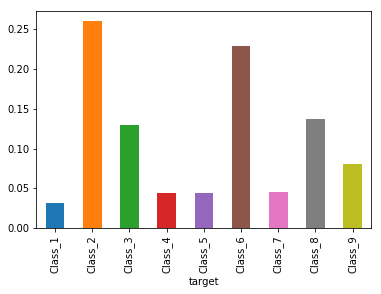

In [9]:
distribution = data.groupby('target').size() / data.shape[0]
distribution.plot(kind='bar')
plt.show()

显示feature 20在不同类下的分布图

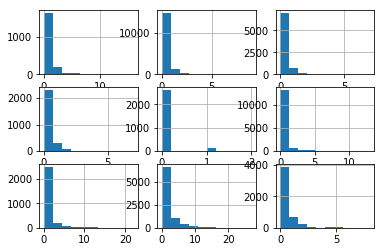

In [12]:
for id in range(1, 10):
    plt.subplot(3, 3, id)
    data[data.target == 'Class_' + str(id)].feat_20.hist()
plt.show()

显示feature 19和feature 20的散点图

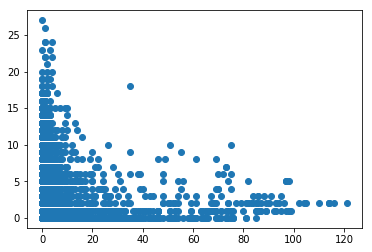

In [15]:
plt.scatter(data.feat_19, data.feat_20)
plt.show()

显示所有feature的相关系数矩阵

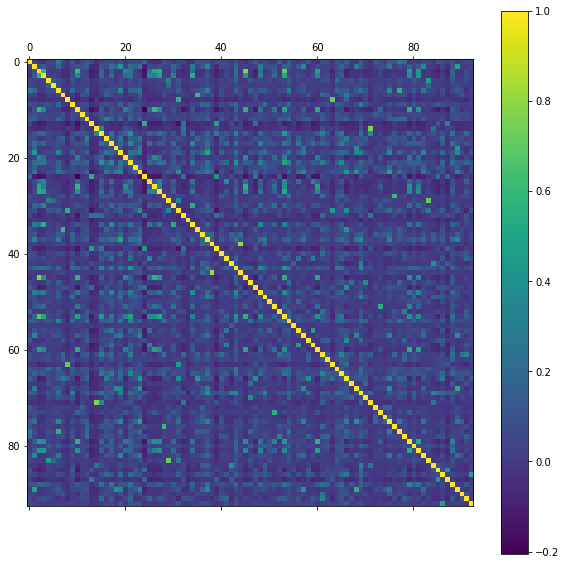

In [20]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
cax = ax.matshow(X.corr(), interpolation='nearest')
fig.colorbar(cax)
plt.show()

In [21]:
num_fea = X.shape[1]

初始化神经网络模型，两个隐藏层，整个网络为93x30x10x9

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
#model_test = MLPClassifier(solver='sgd', learning_rate_init=0.001,alpha=1e-5, hidden_layer_sizes=(25, 9), random_state=31, verbose=True)
model_test = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(50, 30, 10), random_state=31, verbose=True)

In [53]:
model_test.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 30, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=31, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [54]:
y_pred = model_test.predict(X_test)
print('train score: ' + str(model_test.score(X_train, y_train)))
print('test score: ' + str(metrics.accuracy_score(y_test, y_pred)))



train score: 0.818587312532322
test score: 0.7919198448610213


In [55]:
cross_results = cross_val_score(model_test, X, y, scoring='accuracy', cv=5)
print(cross_results)
print('cross_scores_mean: ' + str(cross_results.mean()))

[0.79229278 0.79098328 0.79048158 0.79718811 0.79096274]
cross_scores_mean: 0.7923816943252537


In [56]:
model = model_test

预测需要约1分钟

In [57]:
model.fit(X, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 30, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=31, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

观察模型系数和bias

In [58]:
model.intercepts_

[array([ 0.13899833,  0.46845654,  0.08939695,  0.31080953,  0.32595459,
         0.19961213, -0.10007255,  0.19122762, -0.05748814,  0.08242733,
         0.10047838,  0.16494876, -0.01032372, -0.16526562, -0.00089289,
         0.54160822,  0.44770639, -0.68611215,  0.43798654, -0.07289945,
         0.38541681,  0.02734355,  0.34218035,  0.06225586, -0.10079378,
         0.57278473, -0.07563378,  0.53719342,  0.22525147,  0.39181306,
         0.62309301, -0.40316454,  0.49452502,  0.19749179,  0.0961303 ,
         0.17176538,  0.78448714,  0.07075806,  0.57590824,  0.13626288,
         0.54136582,  0.33958546, -0.16985524,  0.04198466, -0.23499081,
         0.38115421, -0.14675423,  0.32410946,  0.22826754,  0.05364072]),
 array([-0.57934606, -0.15654962,  0.89693322,  0.39589904, -0.40665534,
         0.42176781,  0.18481261,  0.16360722,  0.15738719,  0.17036688,
        -0.50625962, -0.10932532,  0.51353606,  0.55190106,  0.55448229,
         0.78941811, -0.02701195,  1.04975927, -0

In [59]:
print(model.coefs_[0].shape)
print(model.coefs_[1].shape)
print(model.coefs_[2].shape)
print(model.coefs_[3].shape)

(93, 50)
(50, 30)
(30, 10)
(10, 9)


In [62]:
pred = model.predict(X)
pred

array(['Class_6', 'Class_8', 'Class_1', ..., 'Class_9', 'Class_9',
       'Class_9'], dtype='<U7')

输出训练数据上的准确度

In [63]:
model.score(X, y)

0.8172533048902679

In [64]:
sum(pred == y) / len(y)

0.8172533048902679

在测试数据../input/test.csv上进行预测

In [66]:
test_data = pd.read_csv('../input/test.csv')
X_test_date = test_data[test_data.columns[1:]]
print(test_data.shape)
X_test_date.head()

(144368, 94)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,...,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,0,0,0,3,2,1,0,0,0,0,0,0,0,5,3,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,2,0,4,0,4,0,0,0,0,2,0,0,0,8,0,0,0,0,0,...,24,0,0,0,0,0,0,0,0,0,6,8,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,2,0,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,7,1,0,0,0,7,0,2,0,0,0,4,0,0,0,1,1,2,0,0,0,0,0,0,1,0,0,2,0,0,...,10,1,0,2,0,0,1,6,1,1,0,0,1,1,1,2,0,0,2,0,0,0,0,0,0,0,6,0,2,0,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,21,3,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,0,9,0,0,2,0,0,0,0,6,0,8,0,0,0,0,1,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,4,0,5,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9,0,0


In [67]:
test_prob = model.predict_proba(X_test_date)

输出为对每一个商品预测出的属于每一种类别的概率，并加入id列，输出到./otto_prediction.tsv里

In [69]:
solution = pd.DataFrame(test_prob, columns=['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9'])
solution['id'] = test_data['id']
cols = solution.columns.tolist()
cols = cols[-1:] + cols[:-1]
solution = solution[cols]

solution.to_csv('./otto_prediction.tsv', index = False)
